In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['font.family'] = 'tahoma'

In [2]:
train_df = pd.read_csv('v_t_eis_opannyw_detail.csv')

C:\Users\Patta\AppData\Local\Temp\ipykernel_848\1892034472.py:1: DtypeWarning: Columns (18,19,29,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('v_t_eis_opannyw_detail.csv')


In [3]:
print('Train set shape:', train_df.shape)

Train set shape: (3143733, 55)


In [4]:
print(train_df.columns.values)

['source' 'stmt_period' 'status' 'tran_id' 'demand_claim_opd' 'projcode'
 'status_cardb' 'person_type' 'pid' 'sex' 'drg_nhso' 'age' 'age_cal'
 'htype_use' 'hcode' 'htype' 'prov1' 'zone_hcode' 'hmain2' 'prov2'
 'zone_hmain2' 'dateadm' 'datedsc' 'month_serv' 'year_serv' 'date_send'
 'month_send' 'year_send' 'hmain_refer_in' 'hmain_refer_out' 'pdx' 'sdx1'
 'proc1' 'rw_nhso' 'adjrw_nhso' 'sums_serviceitem' 'fund_af' 'sub_fund'
 'item_code' 'item_source' 'cancel_payment' 'base_rate_type' 'sev_group'
 'item_req_qty' 'item_pay_qty' 'charge_rule' 'pre_payment_act_amt'
 'totl_amt' 'act_amt' 'pay_all' 'budgetcode' 'maininscl_af' 'subinscl_af'
 'chkflag_af' 'd_update']


In [5]:
round(train_df.isnull().sum()*100/len(train_df),2).sort_values(ascending=False)


drg_nhso               100.00
rw_nhso                100.00
adjrw_nhso             100.00
hmain_refer_out         99.63
hmain_refer_in          98.97
proc1                   77.20
sdx1                    68.38
demand_claim_opd        63.06
sev_group               17.41
item_pay_qty            16.94
item_req_qty            16.94
base_rate_type           1.20
subinscl_af              0.65
budgetcode               0.27
status_cardb             0.06
zone_hmain2              0.03
chkflag_af               0.03
hmain2                   0.03
prov2                    0.03
sub_fund                 0.00
maininscl_af             0.00
sums_serviceitem         0.00
fund_af                  0.00
act_amt                  0.00
item_code                0.00
item_source              0.00
cancel_payment           0.00
pay_all                  0.00
charge_rule              0.00
pre_payment_act_amt      0.00
totl_amt                 0.00
source                   0.00
year_send                0.00
pdx       

In [6]:
train_df.describe()

,status,status_cardb,person_type,sex,drg_nhso,age,age_cal,hcode,htype,prov1,...,sums_serviceitem,sev_group,item_req_qty,item_pay_qty,charge_rule,pre_payment_act_amt,totl_amt,act_amt,pay_all,d_update
count,3143733.0,3.141693e+06,3143733.0,3.143733e+06,0.0,3.143733e+06,3.143733e+06,3.143733e+06,3.143733e+06,3.143733e+06,...,3.143733e+06,2.596310e+06,2.611269e+06,2.611269e+06,3143700.0,3143700.0,3.143700e+06,3.143700e+06,3.143700e+06,3143733.0
mean,4.0,4.295816e+00,1.0,1.562746e+00,NaN,4.044237e+01,4.044237e+01,1.363428e+04,1.054174e+01,3.914418e+03,...,5.130525e+02,6.806061e+00,1.564734e+01,1.517721e+01,0.0,0.0,7.863256e+01,6.663271e+01,6.663271e+01,20230620.0
std,0.0,1.176236e+00,0.0,4.960474e-01,NaN,2.384950e+01,2.384950e+01,7.949467e+03,1.143744e+00,2.384310e+03,...,1.233696e+03,3.769190e+00,3.693300e+01,3.656201e+01,0.0,0.0,4.622232e+02,1.490379e+02,1.490379e+02,0.0
min,4.0,3.000000e+00,1.0,1.000000e+00,NaN,0.000000e+00,0.000000e+00,9.340000e+02,1.000000e+01,1.000000e+03,...,2.500000e-01,0.000000e+00,-2.000000e+01,-2.000000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,20230620.0
25%,4.0,4.000000e+00,1.0,1.000000e+00,NaN,2.000000e+01,2.000000e+01,1.069600e+04,1.000000e+01,2.300000e+03,...,1.575000e+02,4.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,1.000000e+01,5.000000e+00,5.000000e+00,20230620.0
50%,4.0,4.000000e+00,1.0,2.000000e+00,NaN,4.100000e+01,4.100000e+01,1.088500e+04,1.000000e+01,3.400000e+03,...,3.215000e+02,4.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,4.000000e+01,3.000000e+01,3.000000e+01,20230620.0
75%,4.0,4.000000e+00,1.0,2.000000e+00,NaN,6.100000e+01,6.100000e+01,1.365700e+04,1.000000e+01,5.000000e+03,...,6.717500e+02,1.200000e+01,2.000000e+01,1.500000e+01,0.0,0.0,1.000000e+02,1.000000e+02,1.000000e+02,20230620.0
max,4.0,1.200000e+01,1.0,2.000000e+00,NaN,1.240000e+02,1.240000e+02,7.776600e+04,1.600000e+01,9.600000e+03,...,5.001520e+05,1.900000e+01,2.800000e+03,2.800000e+03,0.0,0.0,5.000000e+05,6.066000e+04,6.066000e+04,20230620.0


In [7]:
train_df.act_amt.sum() ,

(209473265.0500001,)

In [8]:
train_df.describe(include=['O'])

,source,stmt_period,tran_id,demand_claim_opd,projcode,pid,htype_use,hmain2,prov2,hmain_refer_out,...,fund_af,sub_fund,item_code,item_source,cancel_payment,base_rate_type,budgetcode,maininscl_af,subinscl_af,chkflag_af
count,3143733,3143733,3143733,1161310,3143733,3143733,3143733,3142914,3142914,11513.0,...,3143700,3143733,3143733,3143700,3143733,3106126,3135164,3143733,3123329,3142827
unique,2,51,661648,13,3,458731,8,2235,157,249.0,...,24,66,32653,12,3,2,47,9,78,8
top,N,6606_OP_01,8ef9c4a2b591ea06a0b004ec85d930151dfae86d6b40ee...,N||,WALKIN,6a6330753d5dc2bad1d0db7ae565dccb7d3548465fb710...,รพท.,10846,1000,10695.0,...,HC16,WALKIN_DRUG_OTHER,HC16,M_DRUG,N,FEE_F,66-04-06-01-06700-07-01,WEL,89,1
freq,3039805,183767,54,631657,2648910,648,1180970,83797,296555,1392.0,...,3120865,1031727,532431,1396128,3129423,2271219,1797083,1788412,1283800,2516850


In [9]:
train_df.nunique().sort_values(ascending=False)

tran_id                661648
pid                    458731
item_code               32653
sdx1                    24822
sums_serviceitem        18206
proc1                    9912
pdx                      6904
totl_amt                 4747
act_amt                  3902
pay_all                  3902
hcode                    2609
hmain2                   2235
datedsc                   896
dateadm                   896
date_send                 860
hmain_refer_in            525
item_req_qty              428
item_pay_qty              426
hmain_refer_out           249
prov2                     157
age                       112
age_cal                   112
subinscl_af                78
prov1                      77
sub_fund                   66
stmt_period                51
budgetcode                 47
month_serv                 30
month_send                 30
fund_af                    24
sev_group                  18
zone_hmain2                15
demand_claim_opd           13
zone_hcode

In [10]:
print('TRAIN SET MISSING VALUES:')
print(train_df.isna().sum())

TRAIN SET MISSING VALUES:
source                       0
stmt_period                  0
status                       0
tran_id                      0
demand_claim_opd       1982423
projcode                     0
status_cardb              2040
person_type                  0
pid                          0
sex                          0
drg_nhso               3143733
age                          0
age_cal                      0
htype_use                    0
hcode                        0
htype                        0
prov1                        0
zone_hcode                   0
hmain2                     819
prov2                      819
zone_hmain2                819
dateadm                      0
datedsc                      0
month_serv                   0
year_serv                    0
date_send                    0
month_send                   0
year_send                    0
hmain_refer_in         3111485
hmain_refer_out        3132220
pdx                          0
sdx1         

In [11]:
train_df.nunique()

source                      2
stmt_period                51
status                      1
tran_id                661648
demand_claim_opd           13
projcode                    3
status_cardb               10
person_type                 1
pid                    458731
sex                         2
drg_nhso                    0
age                       112
age_cal                   112
htype_use                   8
hcode                    2609
htype                       5
prov1                      77
zone_hcode                 13
hmain2                   2235
prov2                     157
zone_hmain2                15
dateadm                   896
datedsc                   896
month_serv                 30
year_serv                   3
date_send                 860
month_send                 30
year_send                   3
hmain_refer_in            525
hmain_refer_out           249
pdx                      6904
sdx1                    24822
proc1                    9912
rw_nhso   

In [12]:
train_df.dtypes


source                  object
stmt_period             object
status                   int64
tran_id                 object
demand_claim_opd        object
projcode                object
status_cardb           float64
person_type              int64
pid                     object
sex                      int64
drg_nhso               float64
age                      int64
age_cal                  int64
htype_use               object
hcode                    int64
htype                    int64
prov1                    int64
zone_hcode               int64
hmain2                  object
prov2                   object
zone_hmain2            float64
dateadm                  int64
datedsc                  int64
month_serv               int64
year_serv                int64
date_send                int64
month_send               int64
year_send                int64
hmain_refer_in         float64
hmain_refer_out         object
pdx                     object
sdx1                    object
proc1   

Text(0.5, 1.0, 'Target distribution')

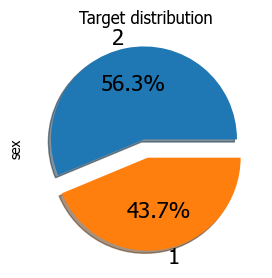

In [13]:
plt.figure(figsize=(3,4))

# Pie plot
train_df['sex'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

Text(0.5, 0, 'Age (years)')

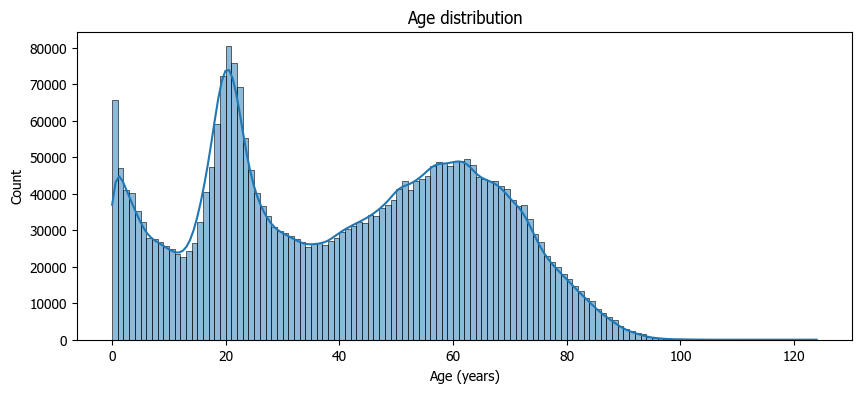

In [14]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sb.histplot(data=train_df, x='age', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

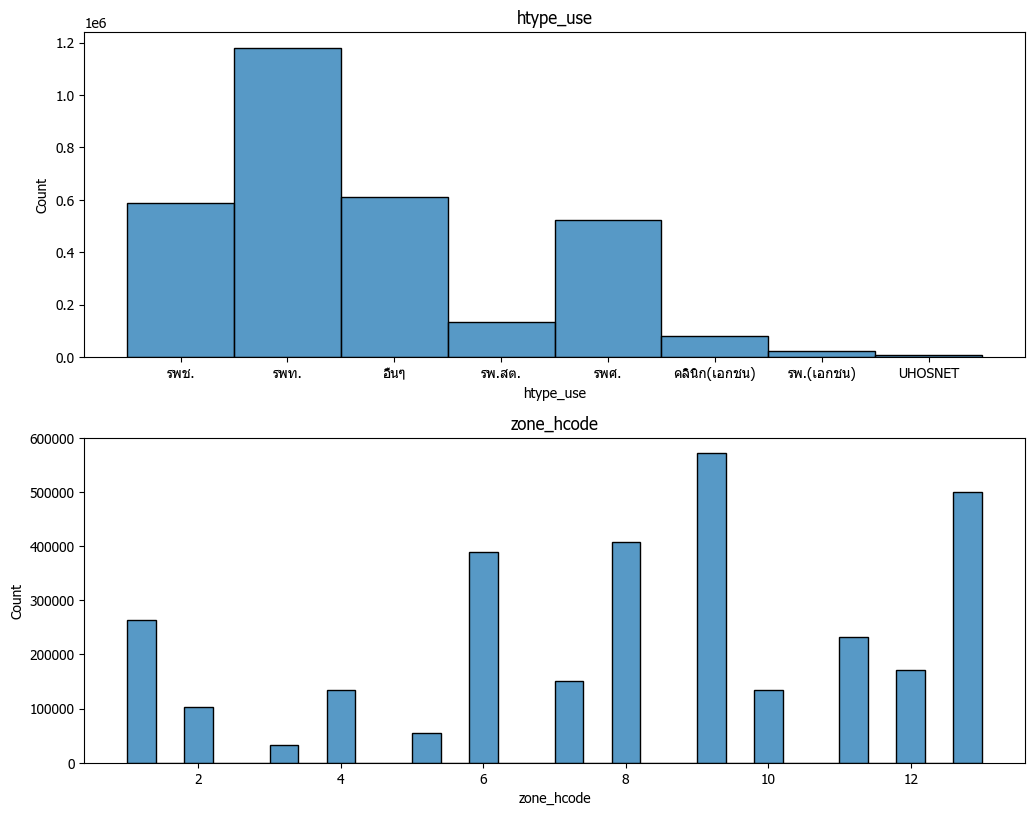

In [15]:
# Expenditure features
exp_feats=['htype_use', 'zone_hcode']

# Plot expenditure features
fig=plt.figure(figsize=(20,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sb.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=False)
    ax.set_title(var_name)
    
fig.tight_layout()  # Improves appearance a bit
plt.show()

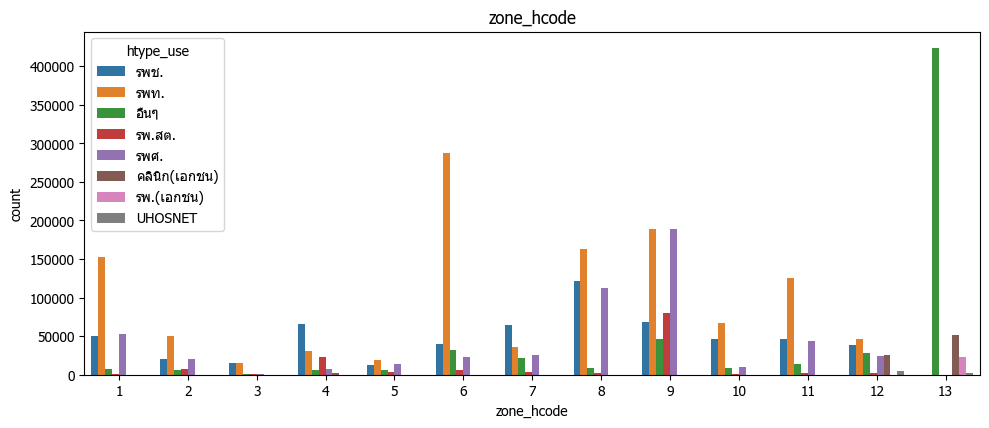

In [16]:
# Categorical features
cat_feats=['zone_hcode']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sb.countplot(data=train_df, x=var_name, axes=ax, hue='htype_use')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [17]:
qual_feats=['month_serv', 'zone_hcode' ,'htype_use']
train_df[qual_feats].head()

,month_serv,zone_hcode,htype_use
0,256602,10,รพช.
1,256602,8,รพช.
2,256509,8,รพท.
3,256602,8,รพช.
4,256508,13,อื่นๆ


    zone_hcode  number
0            1  263413
1            2  102367
2            3   32371
3            4  134868
4            5   54756
5            6  388486
6            7  151536
7            8  407676
8            9  571549
9           10  133798
10          11  231803
11          12  170694
12          13  500416


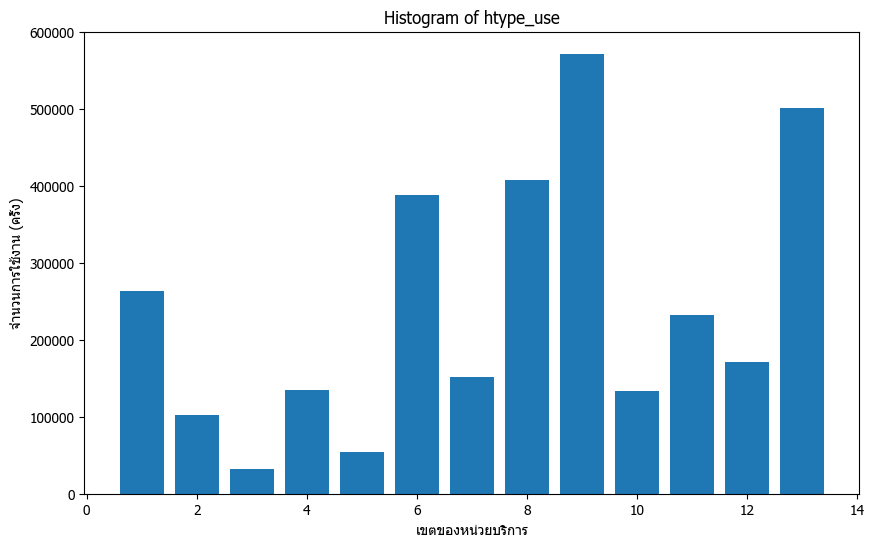

In [18]:
htype_use_result = train_df.groupby('zone_hcode').size().reset_index(name='number')
print(htype_use_result)


plt.figure(figsize=(10, 6))
plt.bar(htype_use_result['zone_hcode'], htype_use_result['number'])
plt.xlabel('เขตของหน่วยบริการ')
plt.ylabel('จำนวนการใช้งาน (ครั้ง)')
plt.title('Histogram of htype_use')
plt.show()



In [19]:
zone_hcode_result = train_df.groupby('zone_hcode').agg(
    hprivite=('htype_use', lambda x: sum(x == 'รพ.(เอกชน)')),
    cilnic=('htype_use', lambda x: sum(x == 'คลินิก(เอกชน)')),
    etc=('htype_use', lambda x: sum(x == 'อื่นๆ'))
).reset_index() 


In [20]:
print(train_df['dateadm']) 
from datetime import datetime


0          25660216
1          25660224
2          25650920
3          25660220
4          25650816
             ...   
3143728    25660601
3143729    25660601
3143730    25660601
3143731    25660601
3143732    25660601
Name: dateadm, Length: 3143733, dtype: int64


In [21]:
# Convert 'dateadm' column to string format
train_df['dateadm'] = train_df['dateadm'].astype(str)

# Extract year, month, and day from 'dateadm' column
train_df['year'] = train_df['dateadm'].str[:4]
train_df['month'] = train_df['dateadm'].str[4:6]
train_df['day'] = train_df['dateadm'].str[6:]
train_df['yearmonth'] = train_df['dateadm'].str[:6]

# Print the modified DataFrame
print(train_df[['year', 'month', 'day','yearmonth']])



         year month day yearmonth
0        2566    02  16    256602
1        2566    02  24    256602
2        2565    09  20    256509
3        2566    02  20    256602
4        2565    08  16    256508
...       ...   ...  ..       ...
3143728  2566    06  01    256606
3143729  2566    06  01    256606
3143730  2566    06  01    256606
3143731  2566    06  01    256606
3143732  2566    06  01    256606

[3143733 rows x 4 columns]


In [22]:
#print(train_df['year']) 
#เช็คจำนวนคอลัมน์ที่เพิ่มเข้ามา
#print('Train set shape:', train_df.shape)

   year  hprivite  cilnic     etc
0  2564         0       0   24639
1  2565     11243   18625  429320
2  2566     11579   60008  157465


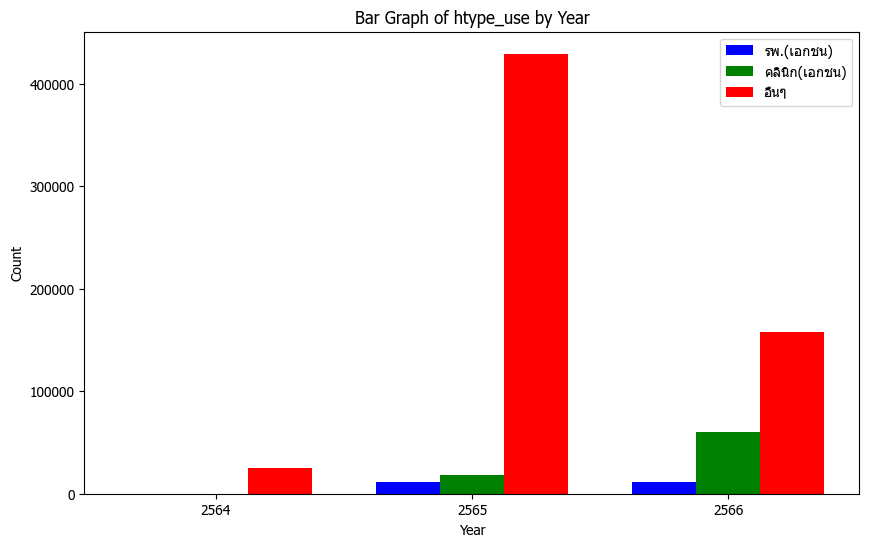

In [23]:
year_result = train_df.groupby('year').agg(
    hprivite=('htype_use', lambda x: sum(x == 'รพ.(เอกชน)')),
    cilnic=('htype_use', lambda x: sum(x == 'คลินิก(เอกชน)')),
    etc=('htype_use', lambda x: sum(x == 'อื่นๆ'))
).reset_index()

# Print the result
print(year_result)



years = year_result['year']
hprivite_counts = year_result['hprivite']
cilnic_counts = year_result['cilnic']
etc_counts = year_result['etc']

# Set the width of each bar
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, hprivite_counts, color='b', width=bar_width, label='รพ.(เอกชน)')
plt.bar(r2, cilnic_counts, color='g', width=bar_width, label='คลินิก(เอกชน)')
plt.bar(r3, etc_counts, color='r', width=bar_width, label='อื่นๆ')

# Set x-axis ticks and labels
plt.xticks([r + bar_width for r in range(len(years))], years)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Graph of htype_use by Year')
plt.legend()
plt.show()



In [24]:
yearmonth_result = train_df.groupby('yearmonth').agg(
    hprivite=('htype_use', lambda x: sum(x == 'รพ.(เอกชน)')),
    cilnic=('htype_use', lambda x: sum(x == 'คลินิก(เอกชน)')),
    etc=('htype_use', lambda x: sum(x == 'อื่นๆ')),
    uhosnet=('htype_use', lambda x: sum(x == 'UHOSNET'))
).reset_index()

# Print the result
print(yearmonth_result)



   yearmonth  hprivite  cilnic     etc  uhosnet
0     256401         0       0    2958        0
1     256402         0       0    2027        0
2     256403         0       0    1857        0
3     256404         0       0    1627        0
4     256405         0       0    1036        0
5     256406         0       0    2225        0
6     256407         0       0    1845        0
7     256408         0       0    2002        0
8     256409         0       0    2064        0
9     256410         0       0    1852        0
10    256411         0       0    2211        0
11    256412         0       0    2935        0
12    256501        15     179    4595        0
13    256502         0      38    5001       49
14    256503         4      66    6909       50
15    256504         1      55    5141       72
16    256505        14     130   24776       14
17    256506         0     463  100843      200
18    256507        84    1481   94698     2174
19    256508       137    2137   56395  

# "การเข้าถึงบริการ" ในเขตพื้นที่ กทม.

In [25]:
import pandas as pd

conditions = (
    (train_df['zone_hcode'] == 13) &
    (train_df['status'] == 4) &
    (train_df['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
    (train_df['projcode'].isin(['WALKIN', 'R9OPFS'])) &
    (train_df['cancel_payment'].isin(['N', 'x']))
)

# ดึงข้อมูลที่เข้าร่วมเงื่อนไข
filtered_data = train_df[conditions]

# นับจำนวนแถวตาม htype_use
htyperesult = filtered_data.groupby('htype_use').size().reset_index(name='เขต13')

print(htyperesult)

       htype_use   เขต13
0        UHOSNET     102
1  คลินิก(เอกชน)   22615
2     รพ.(เอกชน)    7433
3          อื่นๆ  135775


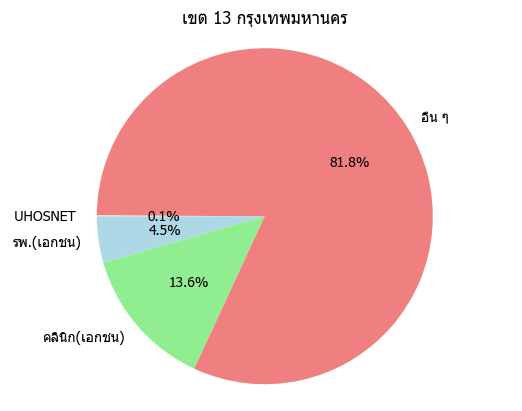

In [26]:
hprivite = 7433
cilnic = 22615
etc = 135775
uhosnet = 102
# สร้างข้อมูลและเลือกสี
labels = ['รพ.(เอกชน)', 'คลินิก(เอกชน)', 'อื่น ๆ ',' UHOSNET ']
sizes = [hprivite, cilnic, etc , uhosnet]
colors = ['lightblue', 'lightgreen', 'lightcoral' , 'lightyellow']

# พล็อตกราฟวงกลม
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

# เพิ่มรายละเอียดกราฟ
plt.title('เขต 13 กรุงเทพมหานคร')
plt.axis('equal')

# แสดงกราฟวงกลม
plt.show()


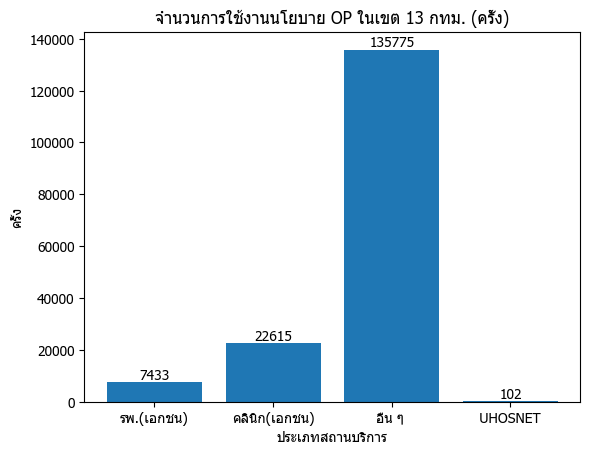

In [27]:
# ตัวแปรที่ใช้สร้างกราฟแท่ง
categories = ['รพ.(เอกชน)', 'คลินิก(เอกชน)', 'อื่น ๆ ',' UHOSNET ']
values = [hprivite, cilnic, etc, uhosnet]

# พล็อตกราฟแท่ง
plt.bar(categories, values)

# เพิ่มรายละเอียดกราฟ
plt.title('จำนวนการใช้งานนโยบาย OP ในเขต 13 กทม. (ครั้ง)')
plt.xlabel('ประเภทสถานบริการ')
plt.ylabel('ครั้ง')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
# แสดงกราฟ
plt.show()


In [28]:
# ตั้งเงื่อนไขการกรองข้อมูล
conditions = (
    (train_df['zone_hcode'] == 13) &
    (train_df['status'] == 4) &
    (train_df['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
    (train_df['projcode'].isin(['WALKIN', 'R9OPFS'])) &
    (train_df['cancel_payment'].isin(['N','x']))
)

# ดึงข้อมูลที่เข้าร่วมเงื่อนไข
filtered_data = train_df[conditions]

# นับจำนวนแถวตาม yearmonth
zone_hcode_month_result = filtered_data.groupby('yearmonth').size().reset_index(name='เขต13')
zone_hcode_month_result = zone_hcode_month_result.sort_values('yearmonth')

print(zone_hcode_month_result)


#zone_hcode_month_result

   yearmonth  เขต13
0     256501    129
1     256502    101
2     256503    154
3     256504    211
4     256505   6817
5     256506  33445
6     256507  23383
7     256508  10495
8     256509   4736
9     256510   6361
10    256511  10964
11    256512  10901
12    256601  12489
13    256602  13263
14    256603  14442
15    256604   9010
16    256605   6492
17    256606   2532


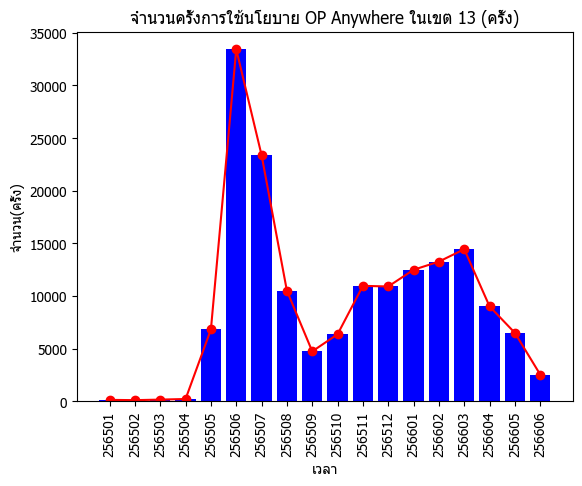

In [29]:
df = zone_hcode_month_result 
#df = df.drop(df.index[0:12])

# พล็อตกราฟแท่ง
plt.bar(range(len(df)), df['เขต13'], color='blue')

# กำหนดแกน x
plt.xticks(range(len(df)), df['yearmonth'], rotation=90)

# พล็อตเส้น
plt.plot(range(len(df)), df['เขต13'], marker='o', color='red')

# เพิ่มรายละเอียดกราฟ
plt.title("จำนวนครั้งการใช้นโยบาย OP Anywhere ในเขต 13 (ครั้ง)")
plt.xlabel("เวลา")
plt.ylabel("จำนวน(ครั้ง)")

# แสดงกราฟ
plt.show()




# รูปแบบการจ่ายชดเชย และ การเข้าถึงบริการ

In [30]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib as plt 
train_df_agg_sum = pd.read_csv('pay_hcode_data.csv')
train_df_export_hospital = pd.read_csv('Export_Hospital.csv')

In [31]:
# ตั้งเงื่อนไขการกรองข้อมูล
conditions = (
    (train_df['zone_hcode'] == 13) &
    (train_df['status'] == 4) &
    (train_df['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
    (train_df['projcode'].isin(['WALKIN', 'R9OPFS'])) &
    (train_df['cancel_payment'].isin(['N','x']))
)

# ดึงข้อมูลที่เข้าร่วมเงื่อนไข
filtered_data = train_df[conditions]

# นับจำนวนแถวตาม yearmonth
zone_hcode_act_sum = filtered_data.groupby('zone_hcode')['act_amt'].sum().reset_index(name='จำนวนการเบิกจ่าย')
zone_hcode_act_sum = zone_hcode_act_sum.sort_values('zone_hcode')

print(zone_hcode_act_sum)

   zone_hcode  จำนวนการเบิกจ่าย
0          13       15582979.75


In [32]:
conditions = (
    (train_df['zone_hcode'] == 13) &
    (train_df['status'] == 4) &
    (train_df['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
    (train_df['projcode'].isin(['WALKIN', 'R9OPFS'])) &
    (train_df['cancel_payment'].isin(['N','x']))
)

filtered_data = train_df[conditions]
month_year_act_sum = filtered_data.groupby('yearmonth')['act_amt'].sum().reset_index(name='จำนวนการเบิกจ่าย')
month_year_act_sum = month_year_act_sum.sort_values('yearmonth')

month_year_act_sum

,yearmonth,จำนวนการเบิกจ่าย
0,256501,10650.00
1,256502,8782.50
2,256503,13235.00
3,256504,20647.00
4,256505,703575.00
5,256506,3045501.00
6,256507,1631372.00
7,256508,762148.00
8,256509,509814.50
9,256510,715810.00


In [33]:
conditions = (
    (train_df['zone_hcode'] == 13) &
    (train_df['status'] == 4) &
    (train_df['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
    (train_df['projcode'].isin(['WALKIN', 'R9OPFS'])) &
    (train_df['cancel_payment'].isin(['N','x']))
)

filtered_data = train_df[conditions]
year_act_sum = filtered_data.groupby('year')['act_amt'].sum().reset_index(name='จำนวนการเบิกจ่าย')
year_act_sum = year_act_sum.sort_values('year')

year_act_sum

,year,จำนวนการเบิกจ่าย
0,2565,9918260.00
1,2566,5664719.75


# Missing Value

In [34]:
print('TRAIN SET MISSING VALUES:')
print(train_df.isna().sum())

TRAIN SET MISSING VALUES:
source                       0
stmt_period                  0
status                       0
tran_id                      0
demand_claim_opd       1982423
projcode                     0
status_cardb              2040
person_type                  0
pid                          0
sex                          0
drg_nhso               3143733
age                          0
age_cal                      0
htype_use                    0
hcode                        0
htype                        0
prov1                        0
zone_hcode                   0
hmain2                     819
prov2                      819
zone_hmain2                819
dateadm                      0
datedsc                      0
month_serv                   0
year_serv                    0
date_send                    0
month_send                   0
year_send                    0
hmain_refer_in         3111485
hmain_refer_out        3132220
pdx                          0
sdx1         

In [35]:
#Explore missing values
na_cols=train_df.columns[train_df.isna().any()].tolist()

mv=pd.DataFrame(train_df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_df),2)
mv

,Number_missing,Percentage_missing
demand_claim_opd,1982423,63.06
status_cardb,2040,0.06
drg_nhso,3143733,100.00
hmain2,819,0.03
prov2,819,0.03
zone_hmain2,819,0.03
hmain_refer_in,3111485,98.97
hmain_refer_out,3132220,99.63
sdx1,2149559,68.38
proc1,2426902,77.20


In [36]:
# train_df= train_df.drop('drg_nhso', axis=1)
# train_df= train_df.drop('rw_nhso', axis=1)
# train_df= train_df.drop('adjrw_nhso', axis=1)
# train_df= train_df.drop('hmain_refer_in', axis=1)
# train_df= train_df.drop('hmain_refer_out', axis=1)

In [37]:
# train_df.nunique().sort_values(ascending=False)
print('TRAIN SET MISSING VALUES AFTER:')
print(train_df.isna().sum())


TRAIN SET MISSING VALUES AFTER:
source                       0
stmt_period                  0
status                       0
tran_id                      0
demand_claim_opd       1982423
projcode                     0
status_cardb              2040
person_type                  0
pid                          0
sex                          0
drg_nhso               3143733
age                          0
age_cal                      0
htype_use                    0
hcode                        0
htype                        0
prov1                        0
zone_hcode                   0
hmain2                     819
prov2                      819
zone_hmain2                819
dateadm                      0
datedsc                      0
month_serv                   0
year_serv                    0
date_send                    0
month_send                   0
year_send                    0
hmain_refer_in         3111485
hmain_refer_out        3132220
pdx                          0
sdx1   

In [38]:
train_df.nunique()

source                      2
stmt_period                51
status                      1
tran_id                661648
demand_claim_opd           13
projcode                    3
status_cardb               10
person_type                 1
pid                    458731
sex                         2
drg_nhso                    0
age                       112
age_cal                   112
htype_use                   8
hcode                    2609
htype                       5
prov1                      77
zone_hcode                 13
hmain2                   2235
prov2                     157
zone_hmain2                15
dateadm                   896
datedsc                   896
month_serv                 30
year_serv                   3
date_send                 860
month_send                 30
year_send                   3
hmain_refer_in            525
hmain_refer_out           249
pdx                      6904
sdx1                    24822
proc1                    9912
rw_nhso   

In [39]:
count_demand_claim_opd = train_df['demand_claim_opd'].value_counts()
print(count_demand_claim_opd)

N||     631657
||      418420
E||      98117
Z||       5884
O||       3591
R||       2816
I||        484
A||        305
||I         14
C||         13
P||          4
E||I         3
|H|          2
Name: demand_claim_opd, dtype: int64


# จัดการ Missing Value Hosmap

In [41]:
train_df_hosmap = pd.read_csv('v_l_hosmap.csv')

In [42]:
train_df_hosmap.nunique()

hcode                    6001
hname                    5752
hlevel                      5
hclass                     73
drug_store                  1
clinic                      1
clinic_lab                  1
private_hospital            1
datein                    579
datein_fyear               19
dateout                     0
htype                       5
htype_name                  5
subtype                    27
sub_type_name              25
sub_type_name_uhosnet       6
innovation_unit           697
uhosnet                     1
status_uc                   7
catm6                     194
province_id                 7
prov                        7
ampr                       51
tumbon                    177
nhso_zone                   6
nhso_zonename               6
latitude                  259
longitude                 257
ingest_tm                   1
dtype: int64

In [43]:
print('TRAIN SET MISSING VALUES AFTER:')
print(train_df_hosmap.isna().sum())

TRAIN SET MISSING VALUES AFTER:
hcode                       0
hname                       0
hlevel                      3
hclass                     60
drug_store               5304
clinic                   5994
clinic_lab               5951
private_hospital         5860
datein                     60
datein_fyear               60
dateout                  6001
htype                       0
htype_name                  0
subtype                     0
sub_type_name               0
sub_type_name_uhosnet       0
innovation_unit          5304
uhosnet                  5994
status_uc                   0
catm6                       0
province_id                 0
prov                        0
ampr                        0
tumbon                      0
nhso_zone                   0
nhso_zonename               0
latitude                 5697
longitude                5697
ingest_tm                   0
dtype: int64


In [44]:
#Explore missing values
hosmap=train_df_hosmap.columns[train_df_hosmap.isna().any()].tolist()
mv=pd.DataFrame(train_df_hosmap[hosmap].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_df_hosmap),2)
mv

,Number_missing,Percentage_missing
hlevel,3,0.05
hclass,60,1.00
drug_store,5304,88.39
clinic,5994,99.88
clinic_lab,5951,99.17
private_hospital,5860,97.65
datein,60,1.00
datein_fyear,60,1.00
dateout,6001,100.00
innovation_unit,5304,88.39


drug_store คือร้านยา มีทั้งหมด 697 แห่ง

In [45]:
# Assuming 'train_df_hosmap' is your DataFrame
train_df_hosmap['drug_store'].fillna(0, inplace=True)  # Fill missing values with 0
drug_store = train_df_hosmap['drug_store'].value_counts()
print(drug_store)

0.0    5304
1.0     697
Name: drug_store, dtype: int64


รหัสที่มีเฉพาะร้านขายยา (ขึ้นต้นด้วย D)

In [46]:
train_df_hosmap['innovation_unit'].fillna('NULL', inplace=True)
innovation_unit	= train_df_hosmap['innovation_unit'].value_counts()
innovation_unit	

NULL     5304
D1016       1
D0029       1
D0030       1
D0605       1
         ... 
D0859       1
D0058       1
D1507       1
D1554       1
D0608       1
Name: innovation_unit, Length: 698, dtype: int64

clinic คือคลินิกบริการผดุงครรภ์ มีทั้งหมด 7 แห่ง

In [47]:
train_df_hosmap['clinic'].fillna(0, inplace=True)  # Fill missing values with 0
clinic = train_df_hosmap['clinic'].value_counts()
print(clinic)

0.0    5994
1.0       7
Name: clinic, dtype: int64


clinic_lab คือคลินิกเทคนิคการแพทย์ มีทั้งหมด 50 แห่ง

In [48]:
train_df_hosmap['clinic_lab'].fillna(0, inplace=True)
clinic_lab = train_df_hosmap['clinic_lab'].value_counts()
print(clinic_lab)

0.0    5951
1.0      50
Name: clinic_lab, dtype: int64


private_hospital คือโรงพยาบาลเอกชน มีทั้งหมด 141 แห่ง

In [49]:
train_df_hosmap['private_hospital'].fillna(0, inplace=True)
private_hospital = train_df_hosmap['private_hospital'].value_counts()
private_hospital

0.0    5860
1.0     141
Name: private_hospital, dtype: int64

drop column dateout

In [50]:
#train_df_hosmap= train_df_hosmap.drop('dateout', axis=1)

uhosnet คือโรงพยาบาลในเครือ UHOSNET มีทั้งหมด 7 โรงพยาบาลได้แก่ รพ.วชิรโรงพยาบาล คณะแพทย์ศาสตร์วชิรพยาบาล มหาวิทยาลัยนวมินทราธิราช , รพ.ศิริราช ,รพ.รามาธิบดี  มหาวิทยาลัยมหิดล , รพ.จุฬาลงกรณ์สภากาชาดไทย , สถาบันสุขภาพเด็กแห่งชาติมหาราชินี , รพ.ราชวิถี , รพ.พระมงกุฎเกล้า

In [51]:
train_df_hosmap['uhosnet'].fillna('NULL', inplace=True) #ช่องว่างให้เพิ่มเป็นคำว่า NULL แทน
uhosnet	= train_df_hosmap['uhosnet'].value_counts()
uhosnet	

NULL       5994
UHOSNET       7
Name: uhosnet, dtype: int64

จัดการกับ Missing Value ของ hlevel

In [52]:
train_df_hosmap['hlevel'].fillna('NULL', inplace=True) #ช่องว่างให้เพิ่มเป็นคำว่า NULL แทน
hlevel = train_df_hosmap['hlevel'].value_counts()
hlevel

36.0    5769
37.0     140
38.0      53
39.0      23
35.0      13
NULL       3
Name: hlevel, dtype: int64

In [53]:
# เช็ค hlevel missing value
filtered_hlevel = train_df_hosmap[train_df_hosmap['hlevel'] == 'NULL']

แทนค่า hlevel ที่ว่างคือ คลินิกเวชกรรมเกษมราษฎร์ สาขาจันทรเกษม , คลินิกเวชกรรมจรัญสนิทวงศ์ 83/1 , วัตสัน ฟาร์มาซี สาขาโลตัส พระราม 4 ทั้งสามเป็นคลินิกและร้านขายยาซึ่งจัดอยู่ในหมวดหมู่ hlevel=36 

In [54]:
#แทนค่า เปลี่ยนแปลงค่าในตาราง
if train_df_hosmap.at[1744, 'hlevel'] == 'NULL':
    train_df_hosmap.at[1744, 'hlevel'] = 36.0

if train_df_hosmap.at[1322, 'hlevel'] == 'NULL':
    train_df_hosmap.at[1322, 'hlevel'] = 36.0

if train_df_hosmap.at[5473, 'hlevel'] == 'NULL':
    train_df_hosmap.at[5473, 'hlevel'] = 36.0

แบ่ง Catm ออกมาเป็น 3 คอลัมน์ได้ดังนี้ จังหวัด ,เขต ,แขวง

In [55]:
# Convert 'dateadm' column to string format
train_df_hosmap['catm6'] = train_df_hosmap['catm6'].astype(str)

# Extract year, month, and day from 'dateadm' column 20220720 // 103901
train_df_hosmap['จังหวัด'] = train_df_hosmap['catm6'].str[:2]
train_df_hosmap['เขต'] = train_df_hosmap['catm6'].str[2:4]
train_df_hosmap['แขวง'] = train_df_hosmap['catm6'].str[4:]

# Print the modified DataFrame
print(train_df_hosmap[['จังหวัด', 'เขต', 'แขวง']])

     จังหวัด เขต แขวง
0         10  41   01
1         10  00   00
2         10  00   00
3         10  00   00
4         10  00   00
...      ...  ..  ...
5996      10  42   03
5997      10  04   03
5998      10  06   08
5999      10  37   01
6000      10  50   01

[6001 rows x 3 columns]


In [56]:
train_df_hosmap['hcode'] = pd.to_numeric(train_df_hosmap['hcode'], errors='coerce')